<a href="https://colab.research.google.com/github/krusegw/inclass/blob/main/GPUonColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
size = 8192 * 8192
array = np.random.random(size).astype(np.float32)
%timeit -n 1 -r 1 result = np.sort(array)

10.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [2]:
import cupy as cp
array_gpu = cp.asarray(array)
%timeit -n 7 -r 1 result_gpu = cp.sort(array_gpu)

110 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [3]:
speedup = 10.8 / 0.110
print(speedup)

98.18181818181819


In [4]:
import numpy as np
# Construct an image with repeated delta functions
deltas = np.zeros((4096, 4096))
deltas[8::16,8::16] = 1

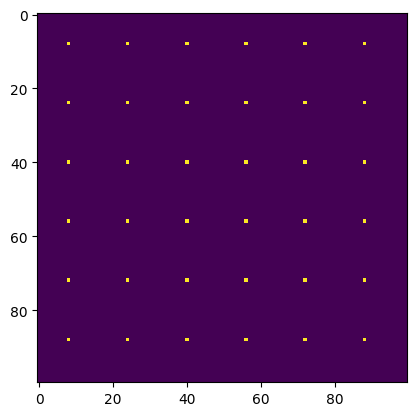

In [5]:
import pylab as pyl
# Necessary command to render a matplotlib image in a Jupyter notebook.
%matplotlib inline
# Display the image
pyl.imshow(deltas[0:100, 0:100])
pyl.show()

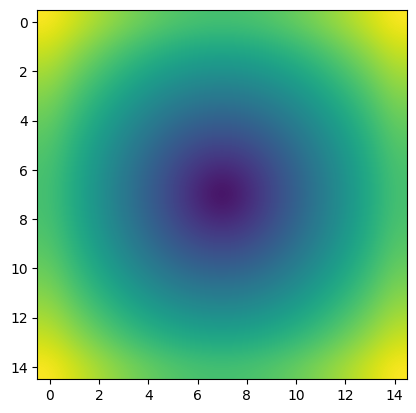

In [6]:
x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
dst = np.sqrt(x*x + y*y)
sigma = 1
muu = 0.000
pyl.imshow(dst,interpolation='bicubic')
pyl.show()

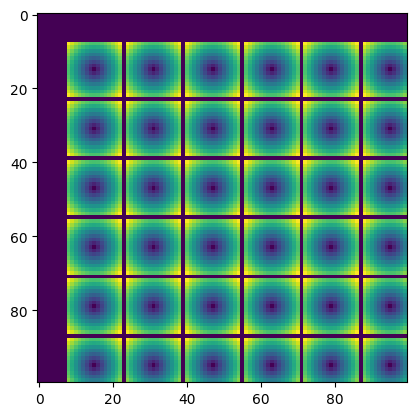

10.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
from scipy.signal import convolve2d as convolve2d_cpu
convolved_image_using_CPU = convolve2d_cpu(deltas, dst)
pyl.imshow(convolved_image_using_CPU[0:100, 0:100])
pyl.show()
%timeit -n 1 -r 1 convolve2d_cpu(deltas, dst)

In [8]:
import cupy as cp
deltas_gpu = cp.asarray(deltas)
dst_gpu = cp.asarray(dst)

In [9]:
from cupyx.scipy.signal import convolve2d as convolve2d_gpu
convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, dst_gpu)
%timeit -n 7 -r 1 convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, dst_gpu)

103 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [10]:
def vector_add(A, B, C, size):
    for item in range(0, size):
        C[item] = A[item] + B[item]

    return C

In [12]:
import cupy
# size of the vectors
size = 1024
# allocating and populating the vectors
a_gpu = cupy.random.rand(size, dtype=cupy.float32)
b_gpu = cupy.random.rand(size, dtype=cupy.float32)
c_gpu = cupy.zeros(size, dtype=cupy.float32)
# CUDA vector_add
vector_add_cuda_code = r'''
extern "C"
__global__ void vector_add(const float * A, const float * B, float * C, const int size)
{
    int item = threadIdx.x;
    C[item] = A[item] + B[item];
}
'''
vector_add_gpu = cupy.RawKernel(vector_add_cuda_code, "vector_add")
vector_add_gpu((1, 1, 1), (size, 1, 1), (a_gpu, b_gpu, c_gpu, size))

In [13]:
import numpy

a_cpu = cupy.asnumpy(a_gpu)
b_cpu = cupy.asnumpy(b_gpu)
c_cpu = numpy.zeros(size, dtype=numpy.float32)

vector_add(a_cpu, b_cpu, c_cpu, size)

# test
if numpy.allclose(c_cpu, c_gpu):
    print("Correct results!")

Correct results!
